In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os
from scipy.optimize import curve_fit

In [2]:
data = pd.read_csv('data/ordertraf_all.csv',sep='\t')

In [3]:
data.ts.describe()

count    482751.000000
mean         12.650511
std          15.678099
min           1.000000
25%           1.000000
50%           3.000000
75%          24.000000
max          59.000000
Name: ts, dtype: float64

In [4]:
data.head()

,user_id,create_time,create_time_next,ordertype,ts,freq
0,0,2018-04-13 09:33:23,2018-04-13 11:29:58,3,1,3164
1,0,2018-04-13 17:56:00,2018-04-15 09:32:28,3,2,41612
2,10004914,2018-03-27 01:03:12,2018-03-29 19:30:12,3,1,6
3,10007342,2018-03-30 12:10:05,2018-04-11 15:30:40,3,1,1
4,10008609,2018-03-29 08:20:24,2018-03-29 10:06:14,3,1,12


In [5]:
data.ts.value_counts().index.max()

59

## 时间

In [3]:
sample=data.ts
max_value = data.ts.value_counts().index.max()
ts = np.arange(1,max_value+1)
amounts =[]
for i in ts:
    amount = len(data[data.ts==i])/len(data)
    amounts.append(amount)

<Container object of 59 artists>

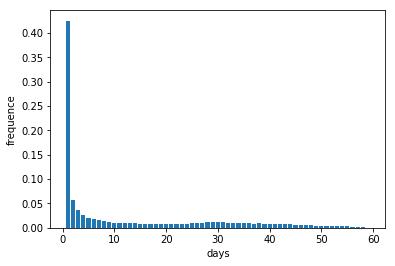

In [4]:
plt.xlabel("days")
plt.ylabel('frequence')
plt.bar(ts,amounts)

In [5]:
"""构建兴趣度"""
amount_j = []
j=0
for i in amounts:
    j = j+i
    amount_j.append(j)
usr_inter = 1-np.array(amount_j)

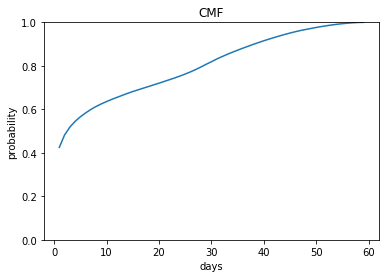

In [9]:
plt.xlabel("days")
plt.ylabel('probability')
plt.title('CMF')
plt.ylim(0,1)
plt.plot(ts,amount_j)

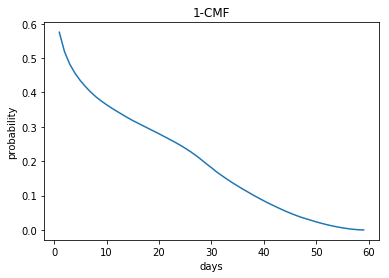

In [10]:
plt.xlabel("days")
plt.ylabel('probability')
plt.title('1-CMF')
plt.plot(ts,1-np.array(amount_j))

In [54]:
usr_inter

array([5.75079078e-01, 5.18279610e-01, 4.82111896e-01, 4.55632407e-01,
       4.34547002e-01, 4.16699292e-01, 4.00722111e-01, 3.86980037e-01,
       3.75038063e-01, 3.64324465e-01, 3.54221949e-01, 3.44850658e-01,
       3.35713442e-01, 3.26648728e-01, 3.18209595e-01, 3.10464401e-01,
       3.02669492e-01, 2.95087944e-01, 2.87357250e-01, 2.79705272e-01,
       2.71694932e-01, 2.63657662e-01, 2.55485747e-01, 2.46897469e-01,
       2.37577965e-01, 2.27699166e-01, 2.16836423e-01, 2.05120238e-01,
       1.92693542e-01, 1.80935928e-01, 1.68546518e-01, 1.57714847e-01,
       1.47210467e-01, 1.37155594e-01, 1.27825732e-01, 1.18510371e-01,
       1.09756375e-01, 1.00892593e-01, 9.26067476e-02, 8.44824765e-02,
       7.66834248e-02, 6.94395247e-02, 6.22411968e-02, 5.53121589e-02,
       4.89320581e-02, 4.28688910e-02, 3.72655883e-02, 3.25095132e-02,
       2.78756543e-02, 2.32707959e-02, 1.90243003e-02, 1.52190260e-02,
       1.17348281e-02, 8.62142181e-03, 5.92230777e-03, 3.67891522e-03,
      

In [11]:
def func(x,a,b):  
    return  b*(a**(x-1))

0.9571553199998191 0.5552143141900808


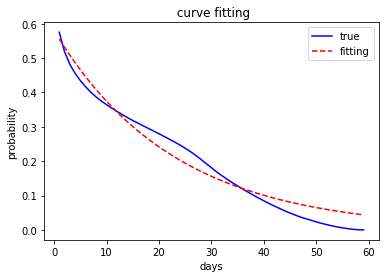

In [16]:
x=ts
y=usr_inter
plt.plot(x,y,'b-',label='true')  
popt, pcov = curve_fit(func, x, y)  
#popt数组中，三个值分别是待求参数a,b,c
print(popt[0],popt[1])
y2 = [func(i, popt[0],popt[1]) for i in x]  
plt.plot(x,y2,'r--',label='fitting')
plt.title(" curve fitting")
plt.xlabel("days")
plt.ylabel("probability")
plt.legend()

$y=0.555*(0.957^{x-1})$ 

## 频次

In [71]:
data.freq.quantile(0.95)

102.0

In [72]:
sample=data[data.freq<100]
indexes = sample.freq.value_counts().index
amounts =[]
for i in indexes:
    amount = len(sample[sample.freq==i])/len(sample)
    amounts.append(amount)

Text(0.5,1,'The bar chart of pv')

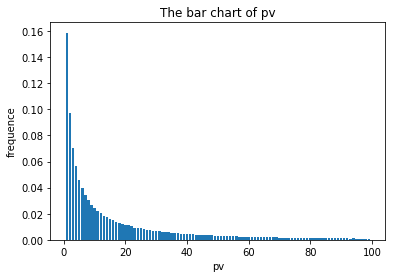

In [75]:
plt.bar(indexes,amounts)
plt.xlabel('pv')
plt.ylabel('frequence')
plt.title("The bar chart of pv")

In [77]:
"""
频次兴趣度
"""
amount_j =0
amounts_j=[]
indexes =  sample.freq.value_counts().index.max()
for i in np.arange(1,indexes+1):
    amount = len(sample[sample.freq==i])/len(sample)
    amount_j = amount+amount_j
    amounts_j.append(amount_j)
    

In [79]:
amounts_int = 1- np.array(amounts_j)

In [118]:
sum(np.array(amounts_j)<0.8)

25

In [91]:
"""
model1 : 考虑第一天与其他天相同
"""
def func(x,a):  
    return  (a**(x))

0.93195455008438


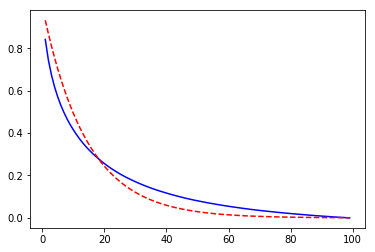

In [92]:
x=np.arange(1,indexes+1)
y=amounts_int
plt.plot(x,y,'b-')  
popt, pcov = curve_fit(func, x, y)  
#popt数组中，三个值分别是待求参数a,b,c
print(popt[0])
y2 = [func(i, popt[0]) for i in x]  
plt.plot(x,y2,'r--')

In [106]:
"""
model2 : 考虑第一天与其他天不同,且b为常数项
"""
def func(x,a):
    return  0.85*(a**(x-1))

0.9403373583065207


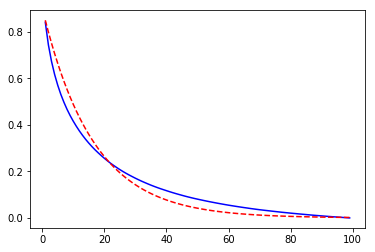

In [107]:
x=np.arange(1,indexes+1)
y=amounts_int
plt.plot(x,y,'b-')  
popt, pcov = curve_fit(func, x, y)  
#popt数组中，三个值分别是待求参数a,b,c
print(popt[0])
y2 = [func(i, popt[0]) for i in x]  
plt.plot(x,y2,'r--')

In [108]:
"""
model3 : 考虑第一天与其他天不同,且b为参数
"""
def func(x,a,b):
    return  b*(a**(x-1))

0.9508399706925509 0.7137648293899425


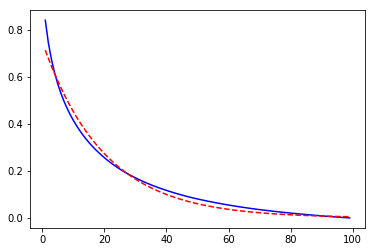

In [109]:
x=np.arange(1,indexes+1)
y=amounts_int
plt.plot(x,y,'b-')  
popt, pcov = curve_fit(func, x, y)  
#popt数组中，三个值分别是待求参数a,b,c
print(popt[0],popt[1])
y2 = [func(i, popt[0],popt[1]) for i in x]  
plt.plot(x,y2,'r--')

$y=b*a^{x-1}$

In [23]:
0.9**10

0.3486784401000001

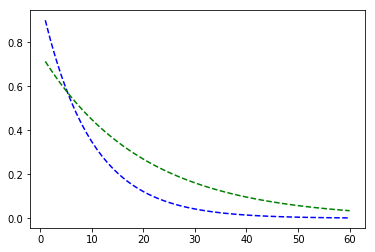

In [29]:
y1 = [0.9**i  for i in range(1,61)]
y2 = [0.713*0.95**(i-1) for i in range(1,61)]
plt.plot(range(1,61),y1,'b--')
plt.plot(range(1,61),y2,'g--')